In [2]:
import numpy as np
from matplotlib import pyplot as plt


In [6]:
################# THIS IS WHERE YOU CHOOSE WHAT TO LOAD ################################

correlation_cut = -1.0   # if negative none, current other options are 0.9 and 0.8, but more can be added

cut_version = -1   # -1 means OG, otherwise can be 2 or 3 (or more if added)

event_type = "ee"  # could be ee, emu, mumu

weight_cmd = "true"   # could also be "false", "true" or "no-neg"

drop = 0.2  # drop rate

input_type = "lorentzdelta_gen"

qg_cmd = False

batch_size = 7000

layer_number = "five"
layer_num_type = "more"

#This is only here in case format is changed... should be good for all three layer stuff otherwise
if layer_number != "GNN":
    model_name = layer_number + "LayerModel_" + event_type + "_corrCut_" + str(correlation_cut) + "_weights_" + weight_cmd + "_drop_" + str(drop)
else:
    model_name = layer_number + "_Model_" + event_type + "_corrCut_" + str(correlation_cut) + "_weights_" + weight_cmd + "_drop_" + str(drop) 
    
if cut_version > 0:
    model_name += "cutV" + str(cut_version)

if input_type != "all":
    model_name += "_" + input_type
    
if not qg_cmd:
    model_name += "_no_qg"
    
if batch_size != -1:
    model_name += "batch_" + str(batch_size)
    
model_name +="_layerordergood"
model_name += "_upsample"
    
# if batch_size != -1:
#     model_name += "batch_" + str(batch_size)

In [7]:
model_name

'fiveLayerModel_ee_corrCut_-1.0_weights_true_drop_0.2_lorentzdelta_gen_no_qgbatch_7000_layerordergood_upsample'

In [8]:
validation = np.load("../data/" + layer_num_type + "_layers/" + model_name + "_loss_val_array.npy")
train = np.load("../data/" + layer_num_type + "_layers/" + model_name + "_loss_train_array.npy")

In [9]:
print("epochs are " + str(10 * len(train)))

epochs are 10


In [13]:
validation

array([0.56983107])

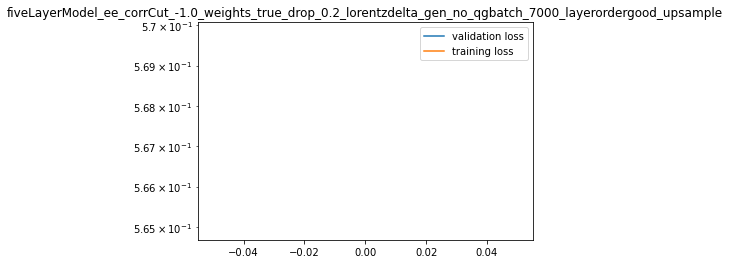

In [11]:
figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(10 *np.array(range( len(validation))), validation, label = "validation loss")
ax.plot(10 *np.array(range(len(train))), train, label="training loss")
ax.legend()
plt.title(model_name)
plt.yscale("log")

In [16]:
min(validation)

0.5488783121109009